# Análisis exploratorio EUR/USD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
data1 = pd.read_csv('datos\EURUSD1.csv', header=None)
data5 = pd.read_csv('datos\EURUSD5.csv', header=None)

In [86]:
data1.columns = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
data5.columns = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']

Vamos a calcular una variable que sea la diferencia entre high y low, que nos va a dar informacion sobre el largo de la vela

In [87]:
data1['candle_body'] = data1['high'] - data1['low']
data5['candle_body'] = data5['high'] - data5['low']

In [92]:
data1['close'][2898]

KeyError: 2898

In [105]:
data1['suba'] = 0
for x in range(1, 2092):
    data1['suba'][x] = data1['close'][x] > data1['close'][x-1] 

C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_11096\1240052189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['suba'][x] = data1['close'][x] > data1['close'][x-1]


In [119]:
data1['baja'] = 0
for x in range(0, 2091):
    data1['baja'][x] = data1['close'][x] < data1['close'][x+1]

C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_11096\3107099363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['baja'][x] = data1['close'][x] < data1['close'][x+1]


In [120]:
data1['inter'] = 0
for x in range(1, 2091):
    data1['inter'][x] = (data1['close'][x] > data1['close'][x-1]) and (data1['close'][x+1] > data1['close'][x])

C:\Users\OscarJaramillo\AppData\Local\Temp\ipykernel_11096\984474559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['inter'][x] = (data1['close'][x] > data1['close'][x-1]) and (data1['close'][x+1] > data1['close'][x])


In [121]:
data1

,date,time,open,high,low,close,volume,candle_body,suba,baja,inter
0,2023.02.07,06:39,1.07296,1.07297,1.07286,1.07290,62,0.00011,0,True,0
1,2023.02.07,06:40,1.07291,1.07296,1.07287,1.07291,67,0.00009,True,True,True
2,2023.02.07,06:41,1.07292,1.07305,1.07292,1.07304,62,0.00013,True,True,True
3,2023.02.07,06:42,1.07304,1.07307,1.07300,1.07306,44,0.00007,True,True,True
4,2023.02.07,06:43,1.07307,1.07318,1.07307,1.07315,57,0.00011,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2087,2023.02.08,17:40,1.07264,1.07268,1.07242,1.07242,120,0.00026,False,False,False
2088,2023.02.08,17:41,1.07240,1.07240,1.07220,1.07223,140,0.00020,False,False,False
2089,2023.02.08,17:42,1.07221,1.07222,1.07204,1.07214,114,0.00018,False,True,False
2090,2023.02.08,17:43,1.07213,1.07244,1.07205,1.07239,142,0.00039,True,False,False


In [122]:
A = sum(data1['suba'])/2091
B = sum(data1['baja'])/2091
AinterB = sum(data1['inter'])/2091

In [125]:
AinterB

0.21807747489239598

In [124]:
A-B

0.0

In [63]:
data1['close'][49]

1.07367

In [51]:
data1['close'][50]

1.07373

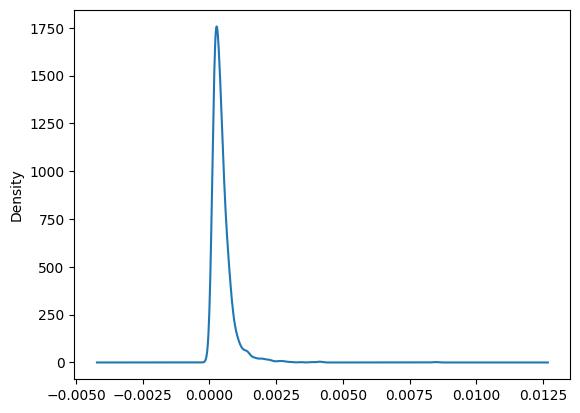

In [50]:
data5['spread'].plot.density()
plt.show()

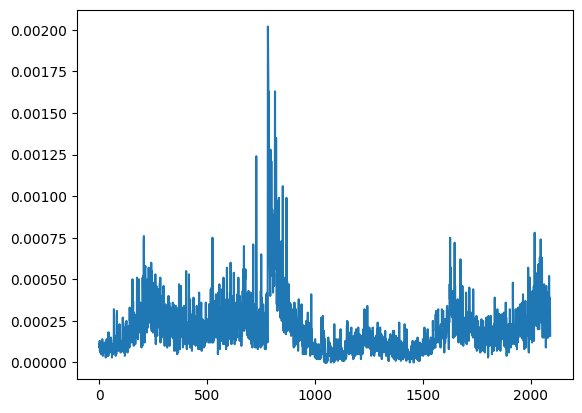

In [42]:
plt.plot(data1.index, data1['spread'])

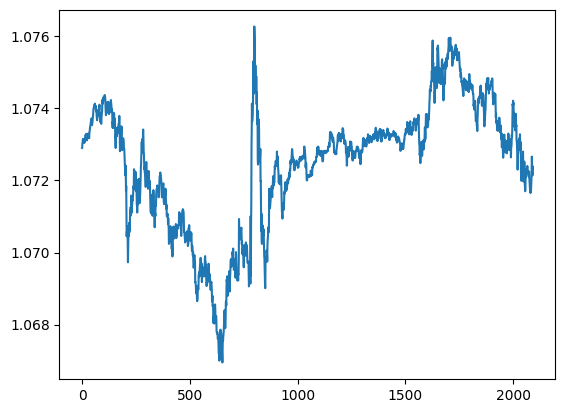

In [30]:
plt.plot(data1.index, data1['close'])

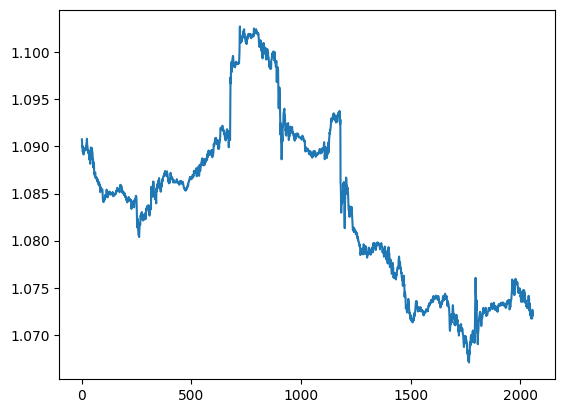

In [31]:
plt.plot(data5.index, data5['close'])